In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
%config InlineBackend.figure_format='retina'
import collections
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['mathtext.fontset'] = 'dejavuserif'
rcParams['mathtext.rm'] = 'serif'
rcParams['mathtext.it'] = 'serif:italic'
rcParams['mathtext.bf'] = 'serif:bold'
rcParams['axes.titlepad'] = 12

In [2]:
from processing_functions import *

In [4]:
def plot_fi_pj(i,j,threshold):
    pertfunc_dict,pertparam_dict = load_pert(threshold)
    for seed in seed_list[threshold]:
        plt.plot(pertparam_dict[seed][i*200:i*200+200,i],pertfunc_dict[seed][i*200:i*200+200,j],'.',markersize=1,alpha=0.4)

In [5]:
def average_f_p(threshold,i,j,pi_range):
    pertfunc_dict,pertparam_dict = load_pert(threshold)
    mean_f = []
    for seed in seed_list[threshold]:
        x = pertparam_dict[seed][200*i:200*i+200,i]
        y = pertfunc_dict[seed][200*i:200*i+200,j]
        f = interp1d(x, y)
        mean_f.append(f(pi_range))
    mean_f = mean_of_list(mean_f)
    #median_f = np.median(np.array(mean_f),axis=0)
    return mean_f

In [6]:
param_list = [r'$\alpha$', r'$\log{M_\mathrm{1}}$', r'$\sigma_{\log{M}}$', r'$\log{M_\mathrm{0}}$', r'$\log{M_{\rm{min}}}$',\
              r'$A_{\rm{cen}}$', r'$A_{\rm{sat}}$']

r_wp = np.logspace(-1,1.5,30)
r_wp = (r_wp[1:]+r_wp[:-1])/2.

r_ds = np.logspace(-1,1.5,31)
r_ds = np.sqrt(0.5*(r_ds[1:]**2 + r_ds[:-1]**2))

r_vpf = np.logspace(0,1,30)

cic_bin = np.concatenate([np.arange(10),np.around(np.logspace(1,np.log10(150),30-10)).astype(np.int)])
cia_bin = np.concatenate([np.arange(10),np.around(np.logspace(1,np.log10(200),30-10)).astype(np.int)])

q_ratio = np.linspace(0,1,30+2)[1:-1]*100.

obs_list = [r'$n_{\mathrm{gal}}$',]+\
            list([r'$w_{\mathrm{p}}(r_{\mathrm{p}}= %.2f h^{-1}\mathrm{Mpc})$'%r for r in r_wp])+\
            list([r'$\Delta \Sigma(r_{\mathrm{p}}=%.2f h^{-1}\mathrm{Mpc})$'%r for r in r_ds])+\
            list([r'$\mathrm{VPF}(r=%.2f h^{-1}\mathrm{Mpc})$'%r for r in r_vpf])+\
            list([r'$P(N_{\mathrm{CIC}}=%d)$'%i for i in range(10)])+\
            list([r'$P(%d\leq N_{\mathrm{CIC}}<%d)$'%(cic_bin[i],cic_bin[i+1]) for i in range(10,29)])+\
            [r'$P(N_{\mathrm{CIC}} \geq %d)$'%cic_bin[-1],]+\
            list([r'$P(N_{\mathrm{CIA}}=%d)$'%i for i in range(10)])+\
            list([r'$P(%d\leq N_{\mathrm{CIA}}<%d)$'%(cia_bin[i],cia_bin[i+1]) for i in range(10,29)])+\
            [r'$P(N_{\mathrm{CIA}} \geq %d)$'%cia_bin[-1],]+\
            list([r'$Q_{%.2f}(N_2/N_5)$'%q_ratio[i] for i in range(30)])

In [7]:
def plot_save(i,j,threshold,save=1):
    fig = plt.figure(figsize=(13,10))
    plt.xlabel(param_list[i],fontsize=30)
    plt.ylabel(obs_list[j],fontsize=30)
    plot_fi_pj(i,j,threshold)
    x_new = np.linspace(p0_list[threshold][i]-0.9*oneside_dict[threshold][i],p0_list[threshold][i]+0.9*oneside_dict[threshold][i],201)
    interpol = average_f_p(threshold,i,j,x_new)
    plt.axvline(p0_list[threshold][i],c='k',ls=':')
    dfdp = locfit_deriv_singley(interpol,1,x_new,p0_list[threshold][i])
    dfdp01 = locfit_deriv_singley(interpol,0.1,x_new,p0_list[threshold][i])
    gcva = gcv_alpha_singley(x_new,interpol)
    plt.plot(x_new,(x_new-x_new[100])*dfdp+interpol[100],'r--',lw=2,label='locfit slope, alpha=1')
    plt.plot(x_new,(x_new-x_new[100])*dfdp01+interpol[100],'g--',lw=2,label='locfit slope, alpha=0.1')
    plt.plot(x_new,interpol,'b',label='averaged interpolation',lw=2,alpha=1)
    plt.legend(frameon=False,fontsize=30)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    if save:
        fig.savefig('Fit_average_curve/'+threshold+'_p'+str(i)+'_f'+str(j)+'.png')
        plt.close(fig)
    return dfdp,dfdp01,gcva

(-0.006240695146742928, -0.0020113885768752674, 0.0804123669185678)

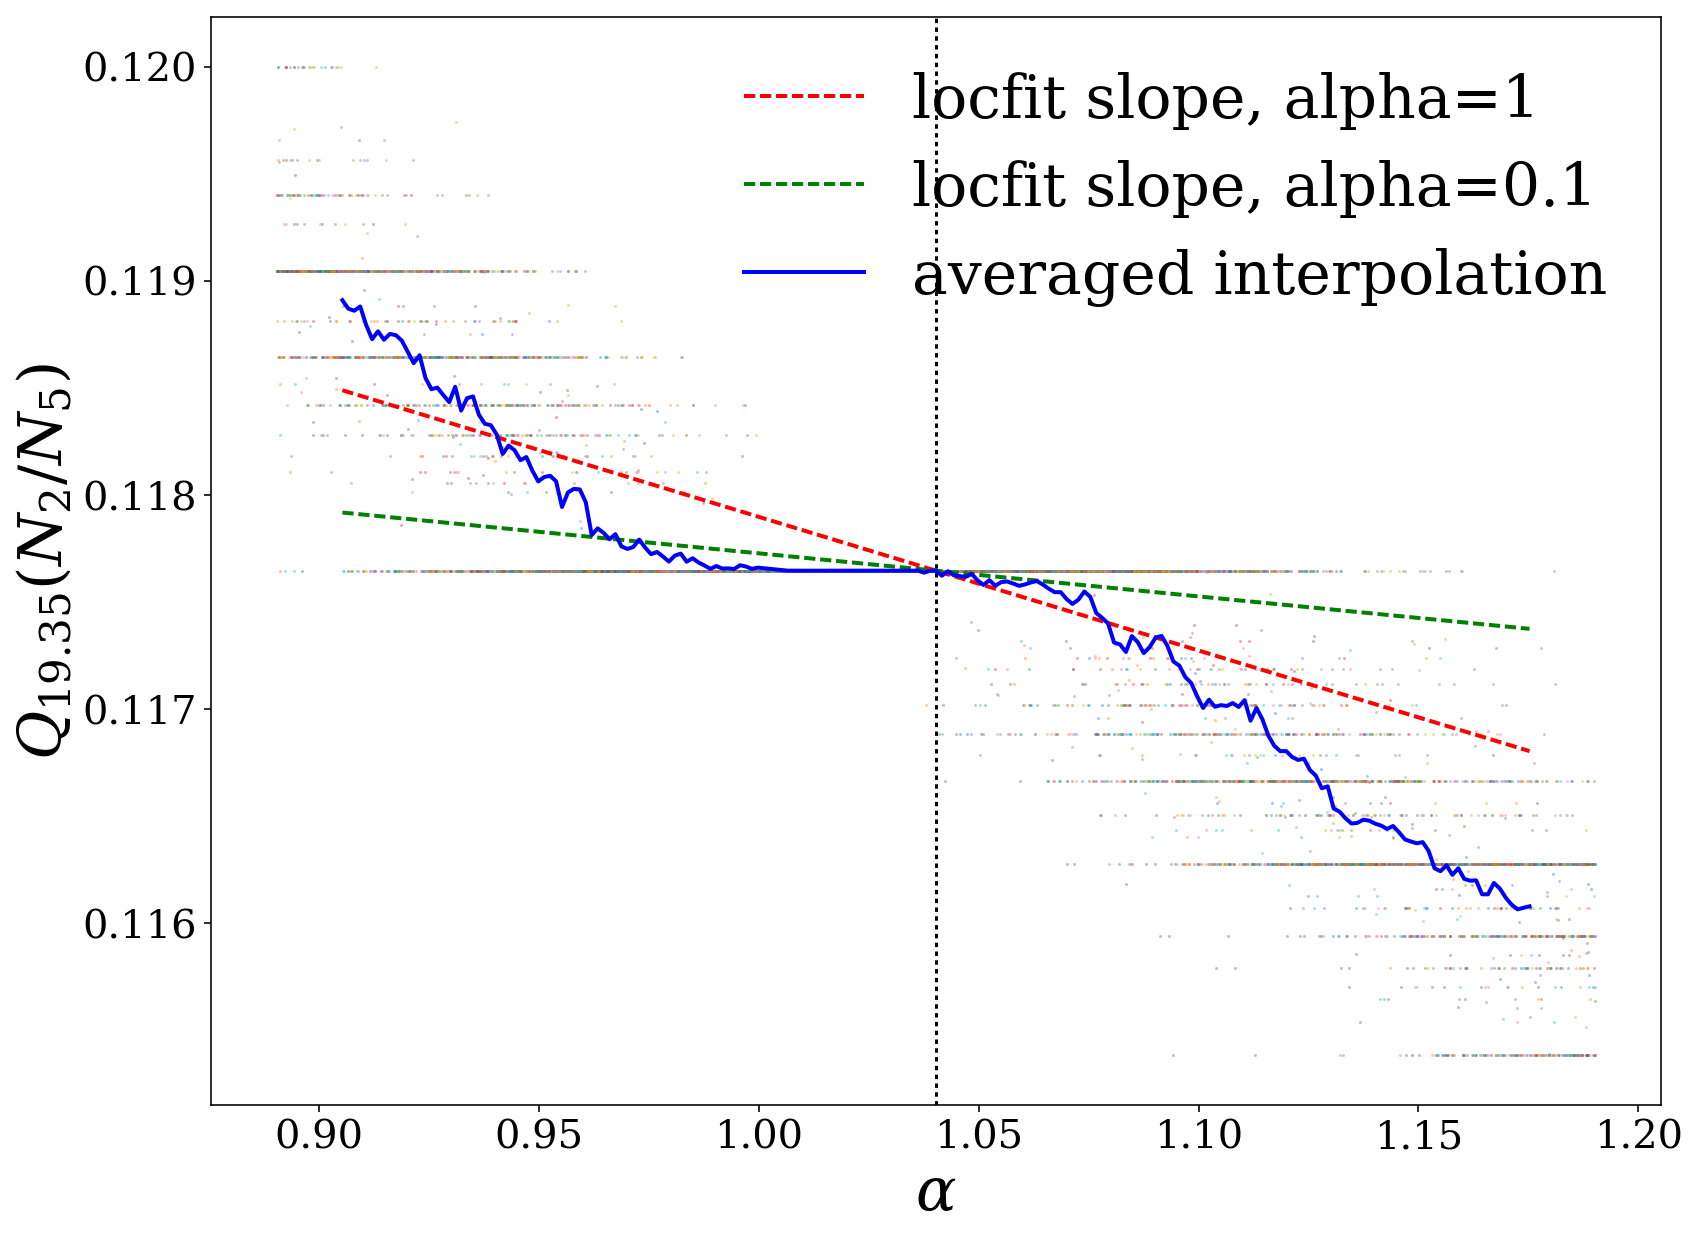

In [12]:
plot_save(0,155,'-19.0',save=0)

In [10]:
locfit_average_curve_dict = {}
locfit01_average_curve_dict = {}
gcva_dict = {}

th = '-19.0'
locfit_average_curve_dict[th] = np.zeros((7,180))
locfit01_average_curve_dict[th] = np.zeros((7,180))
gcva_dict[th] = np.zeros((7,180))
for i in range(7):
    for j in range(180):
        locfit_average_curve_dict[th][i,j],\
        locfit01_average_curve_dict[th][i,j],\
        gcva_dict[th][i,j] = plot_save(i,j,th)

In [11]:
th = '-19.5'
locfit_average_curve_dict[th] = np.zeros((7,180))
locfit01_average_curve_dict[th] = np.zeros((7,180))
gcva_dict[th] = np.zeros((7,180))
for i in range(7):
    for j in range(180):
        locfit_average_curve_dict[th][i,j],\
        locfit01_average_curve_dict[th][i,j],\
        gcva_dict[th][i,j] = plot_save(i,j,th)

In [12]:
th = '-20.0'
locfit_average_curve_dict[th] = np.zeros((7,180))
locfit01_average_curve_dict[th] = np.zeros((7,180))
gcva_dict[th] = np.zeros((7,180))
for i in range(7):
    for j in range(180):
        locfit_average_curve_dict[th][i,j],\
        locfit01_average_curve_dict[th][i,j],\
        gcva_dict[th][i,j] = plot_save(i,j,th)

In [13]:
th = '-20.5'
locfit_average_curve_dict[th] = np.zeros((7,180))
locfit01_average_curve_dict[th] = np.zeros((7,180))
gcva_dict[th] = np.zeros((7,180))
for i in range(7):
    for j in range(180):
        locfit_average_curve_dict[th][i,j],\
        locfit01_average_curve_dict[th][i,j],\
        gcva_dict[th][i,j] = plot_save(i,j,th)

In [14]:
th = '-21.0'
locfit_average_curve_dict[th] = np.zeros((7,180))
locfit01_average_curve_dict[th] = np.zeros((7,180))
gcva_dict[th] = np.zeros((7,180))
for i in range(7):
    for j in range(180):
        locfit_average_curve_dict[th][i,j],\
        locfit01_average_curve_dict[th][i,j],\
        gcva_dict[th][i,j] = plot_save(i,j,th)

/home/kuw8/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in divide
  from ipykernel import kernelapp as app
/home/kuw8/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in divide
  from ipykernel import kernelapp as app
/home/kuw8/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in divide
/home/kuw8/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in divide
/home/kuw8/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in divide
/home/kuw8/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in divide


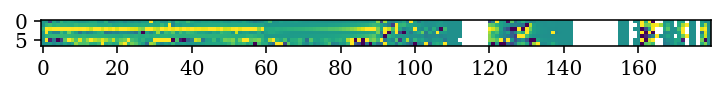

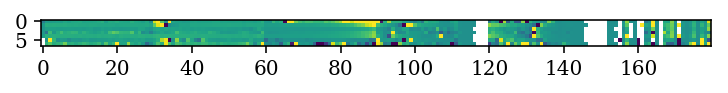

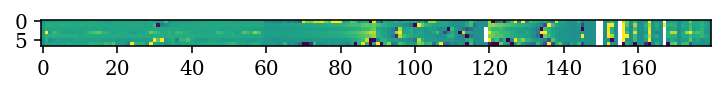

In [51]:
plt.figure()
plt.imshow(locfit01_average_curve_dict['-21.0']/locfit01_average_curve_dict['-20.5'],vmin=-5,vmax=5)
plt.figure()
plt.imshow(locfit01_average_curve_dict['-20.5']/locfit01_average_curve_dict['-20.0'],vmin=-5,vmax=5)
plt.figure()
plt.imshow(locfit01_average_curve_dict['-20.0']/locfit01_average_curve_dict['-19.5'],vmin=-5,vmax=5)

In [24]:
print np.min(gcva_dict['-19.0']),np.min(gcva_dict['-19.5']),np.min(gcva_dict['-20.0']),np.min(gcva_dict['-20.5']),np.min(gcva_dict['-21.0'])
print np.max(gcva_dict['-19.0']),np.max(gcva_dict['-19.5']),np.max(gcva_dict['-20.0']),np.max(gcva_dict['-20.5']),np.max(gcva_dict['-21.0'])

0.0500520215686 0.0500506488834 0.0500470285544 0.0500538438158 0.0500513920011
0.946347120629 0.94994443728 0.94994443728 0.94994443728 0.94994443728


In [25]:
jkcov = (np.load('Run_30_bins_for_all/jk_19p0_x.npz')['jkcov']+np.load('Run_30_bins_for_all/jk_19p0_y.npz')['jkcov']\
             +np.load('Run_30_bins_for_all/jk_19p0_z.npz')['jkcov'])/3.
fidreal = np.load('Run_30_bins_for_all/fidreal_19p0.npz')['func']
fidrandom = np.load('Run_30_bins_for_all/fidrandom_19p0.npz')

covtot = calc_covariance(jkcov,fidreal,fidrandom)
cov_cut = apply_to_dict(cov_clean,cut_by_func_2D(covtot))
nzidx_cut = apply_to_dict(cov_clean,cut_by_func_2D(covtot),return_idx=1)
invcov_cut = apply_to_dict(inv_cov,cov_cut,rcond=1e-4)

p0 = p19p0
oneside = oneside_ranges[0]

In [30]:
dfdp01_cut = cut_by_func_1D(locfit01_average_curve_dict['-19.0'],axis=1)
dfdp_cut = cut_by_func_1D(locfit_average_curve_dict['-19.0'],axis=1)

In [31]:
fisher01_cut = apply_to_dict(calc_fisher,dfdp01_cut,invcov_cut)
sigma01_cut = apply_to_dict(calc_1sigma,fisher01_cut)
fisher_cut = apply_to_dict(calc_fisher,dfdp_cut,invcov_cut)
sigma_cut = apply_to_dict(calc_1sigma,fisher_cut)

In [32]:
keylist = ['w','d','v','c','a','r','wd','wv','wc','wa','wr','dv','dc','da','dr','vc','va','vr','ca','cr','ar',\
        'wdv','wdc','wda','wdr','wvc','wva','wvr','wca','wcr','war','dvc','dva','dvr','dca','dcr','dar',\
         'vca','vcr','var','car','wdvc','wdva','wdvr','wdca','wdcr','wdar','wvca','wvcr','wvar','wcar',\
        'dvca','dvcr','dvar','dcar','vcar','wdvca','wdvcr','wdvar','wdcar','wvcar','dvcar','wdvcar']

In [33]:
comblist = [r'$w_\mathrm{p}(r_\mathrm{p})$',r'$\Delta\Sigma(r_\mathrm{p})$',\
            r'$w_\mathrm{p}(r_\mathrm{p})+\Delta\Sigma(r_\mathrm{p})$',\
            r'$w_\mathrm{p}(r_\mathrm{p})+\Delta\Sigma(r_\mathrm{p})+VPF(r)$','$VPF(r)$',\
            r'$\rm{CIC}$',r'$\rm{CIA}$',r'$Q(N_{\mathrm{1}}/N_{\mathrm{2}})$',\
            r'$w_\mathrm{p}(r_\mathrm{p})+\rm{CIC}$',r'$w_\mathrm{p}(r_\mathrm{p})+\rm{CIA}$',\
            r'$w_\mathrm{p}(r_\mathrm{p})+Q(N_{\mathrm{1}}/N_{\mathrm{2}})$',\
            r'$w_\mathrm{p}(r_\mathrm{p})+\rm{CIC}+\rm{CIA}$',\
            r'$w_\mathrm{p}(r_\mathrm{p})+\rm{CIC}+Q(N_{\mathrm{1}}/N_{\mathrm{2}})$',\
            r'$w_\mathrm{p}(r_\mathrm{p})+\rm{CIA}+Q(N_{\mathrm{1}}/N_{\mathrm{2}})$',\
            r'$w_\mathrm{p}(r_\mathrm{p})+\Delta\Sigma(r_\mathrm{p})+VPF(r)+$'+'\n'+r'$\rm{CIC}+\rm{CIA}+Q(N_{\mathrm{1}}/N_{\mathrm{2}})$']

In [34]:
combidx = [0,1,6,21,2,3,4,5,8,9,10,28,29,30,62]
np.array(keylist)[combidx]

array(['w', 'd', 'wd', 'wdv', 'v', 'c', 'a', 'r', 'wc', 'wa', 'wr', 'wca',
       'wcr', 'war', 'wdvcar'],
      dtype='|S6')

In [35]:
sigma01_19p0 = []
sigma_19p0 = []

for k in keylist:
    sigma01_19p0.append(sigma01_cut[k])
    sigma_19p0.append(sigma_cut[k])
    
sigma01_19p0 = np.array(sigma01_19p0)
sigma_19p0 = np.array(sigma_19p0)

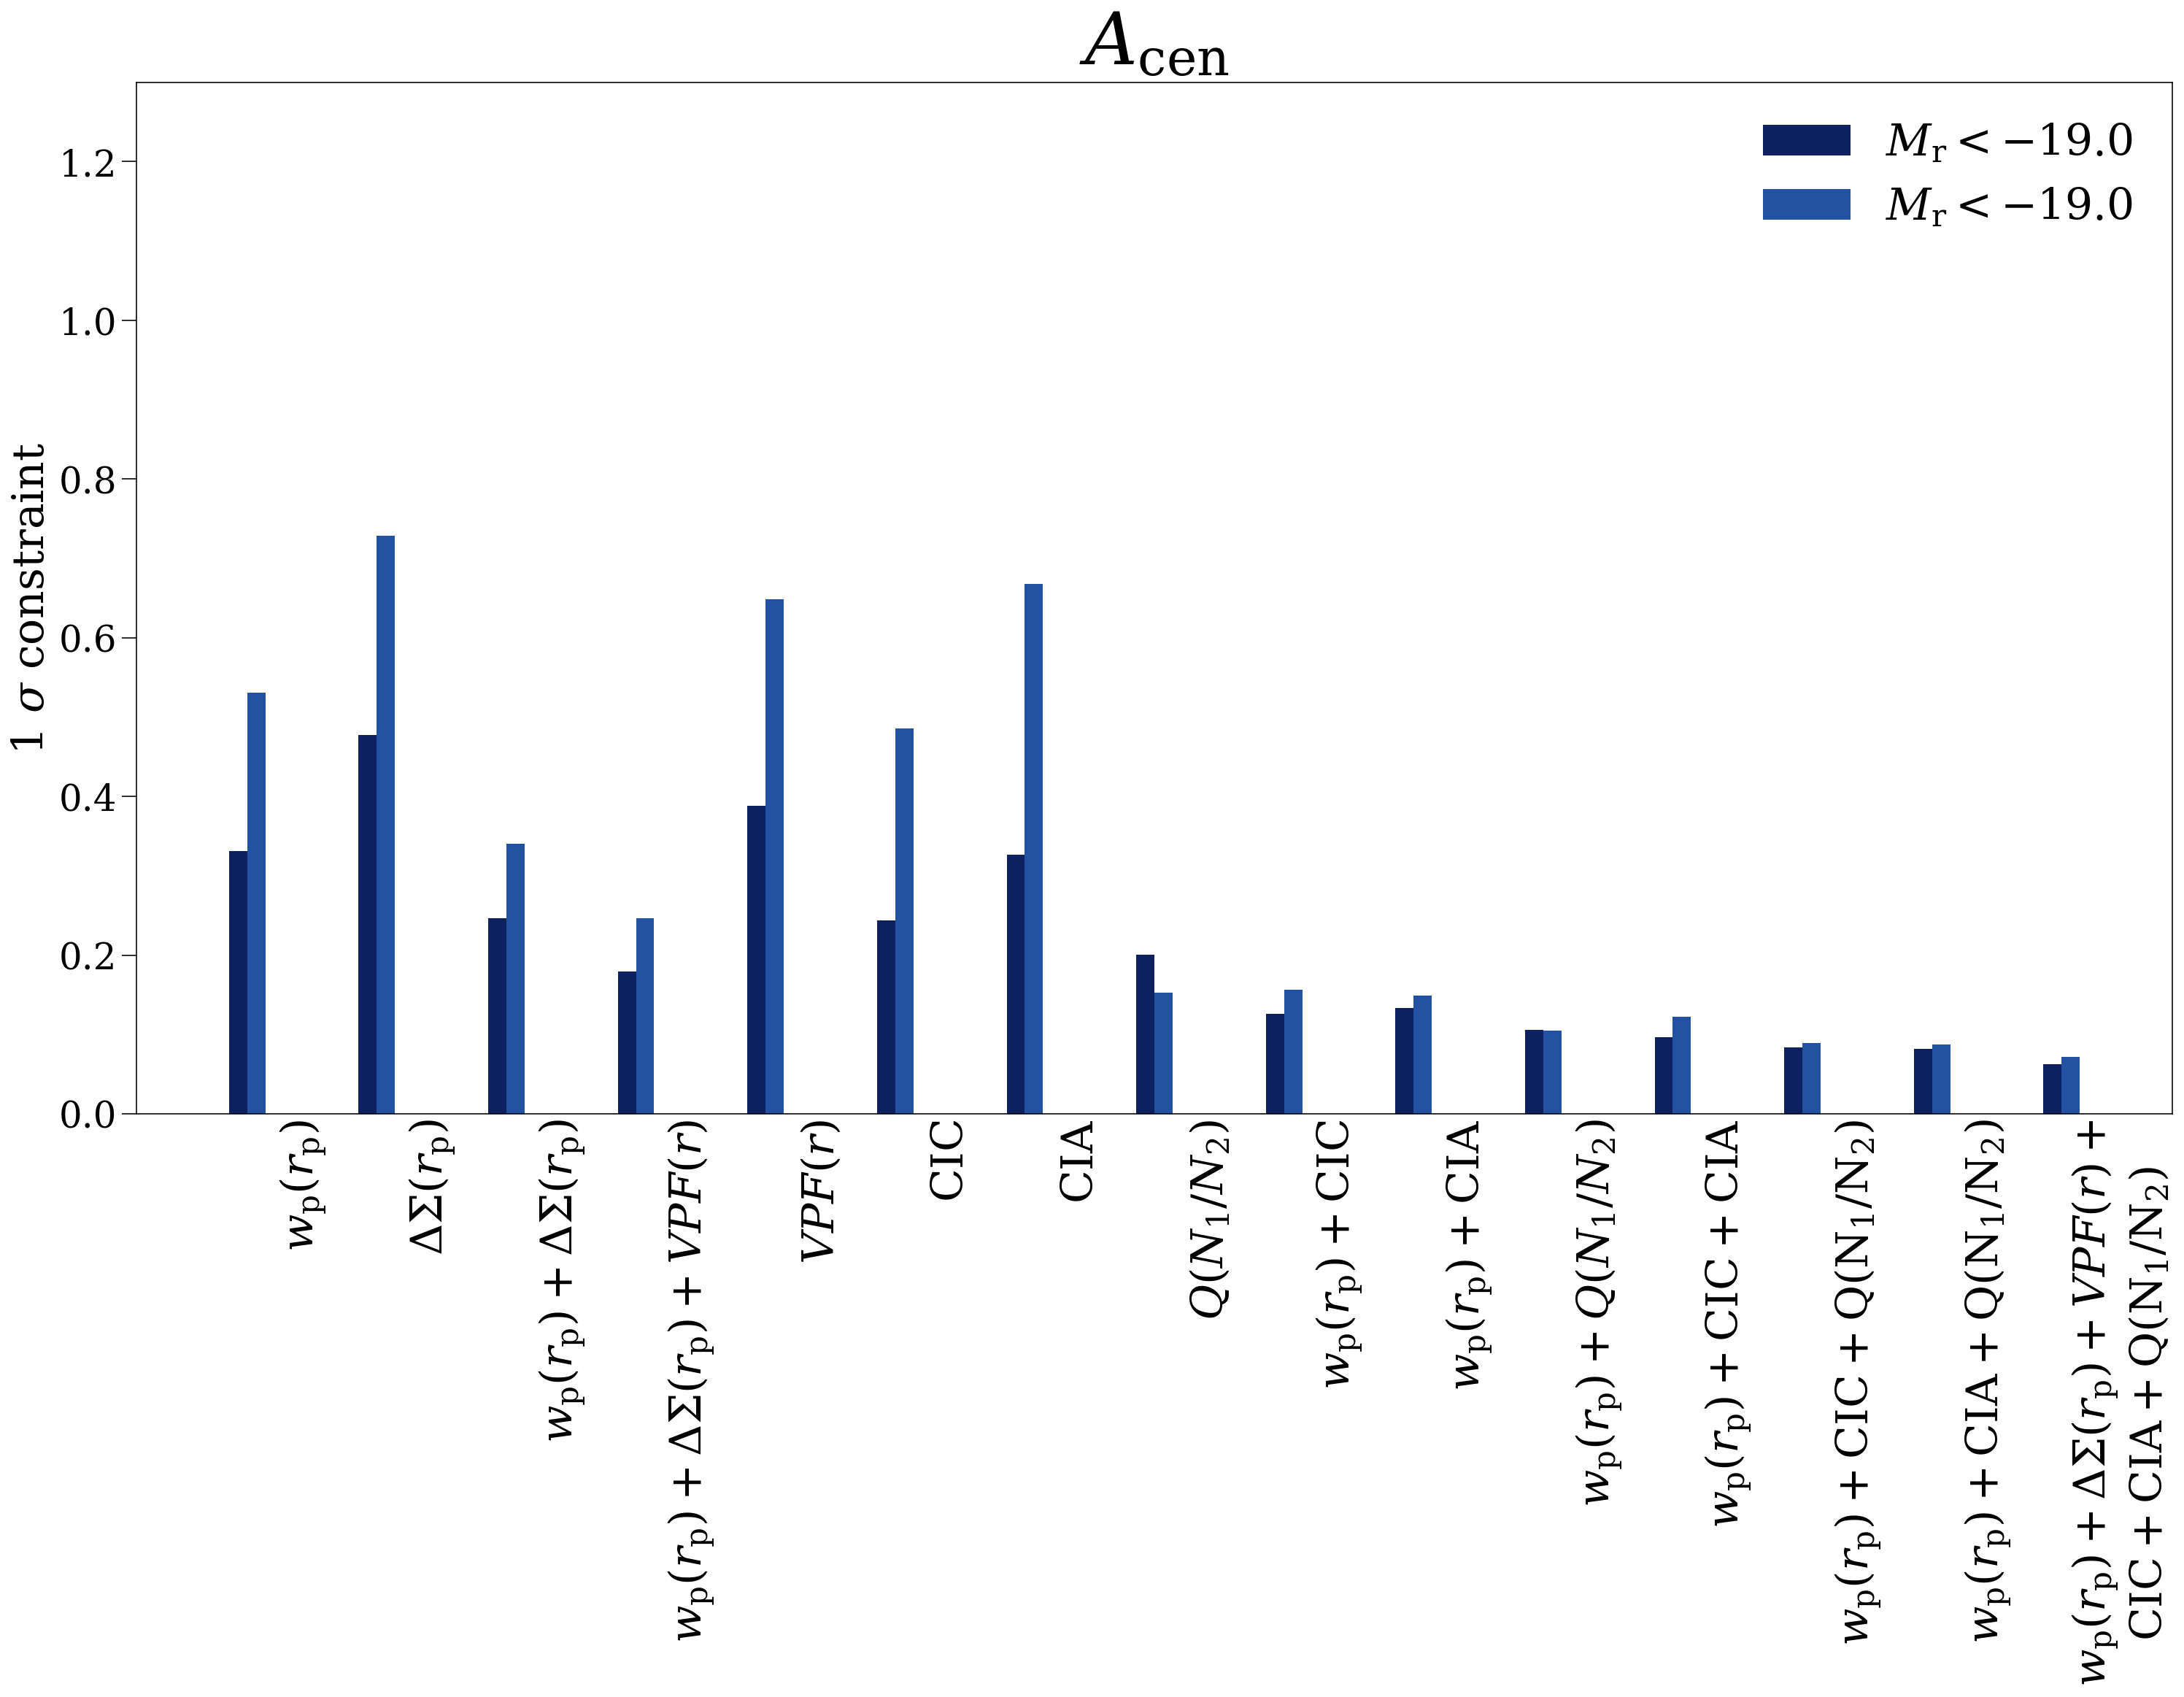

In [36]:
N = 15

ind = np.arange(N)  # the x locations for the groups
width = 0.14       # the width of the bars

fig, ax = plt.subplots(figsize=(25,13))
rects1 = ax.bar(ind, sigma01_19p0[combidx,5], width, color=cm.YlGnBu(250))
rects2 = ax.bar(ind+width, sigma_19p0[combidx,5], width, color=cm.YlGnBu(200))

# add some text for labels, title and axes ticks
ax.set_ylabel(r'$1\ \sigma\ \rm{constraint}$',fontsize=30)
ax.set_title(r'$A_{\rm{cen}}$',fontsize=50)
ax.set_xticks(np.arange(N)+0.5)
ax.set_xticklabels(comblist,rotation=90,fontsize=30)
ax.set_yticklabels([0.0,0.2,0.4,0.6,0.8,1.0,1.2],fontsize=25)
ax.tick_params(axis='x',length=0)
ax.tick_params(axis='y',length=10)


ax.legend((rects1[0], rects2[0]),\
          (r'$M_{\rm{r}}<-19.0$',r'$M_{\rm{r}}<-19.0$'),frameon=False,fontsize=30)

ax.set_ylim(0,1.3)

plt.show()

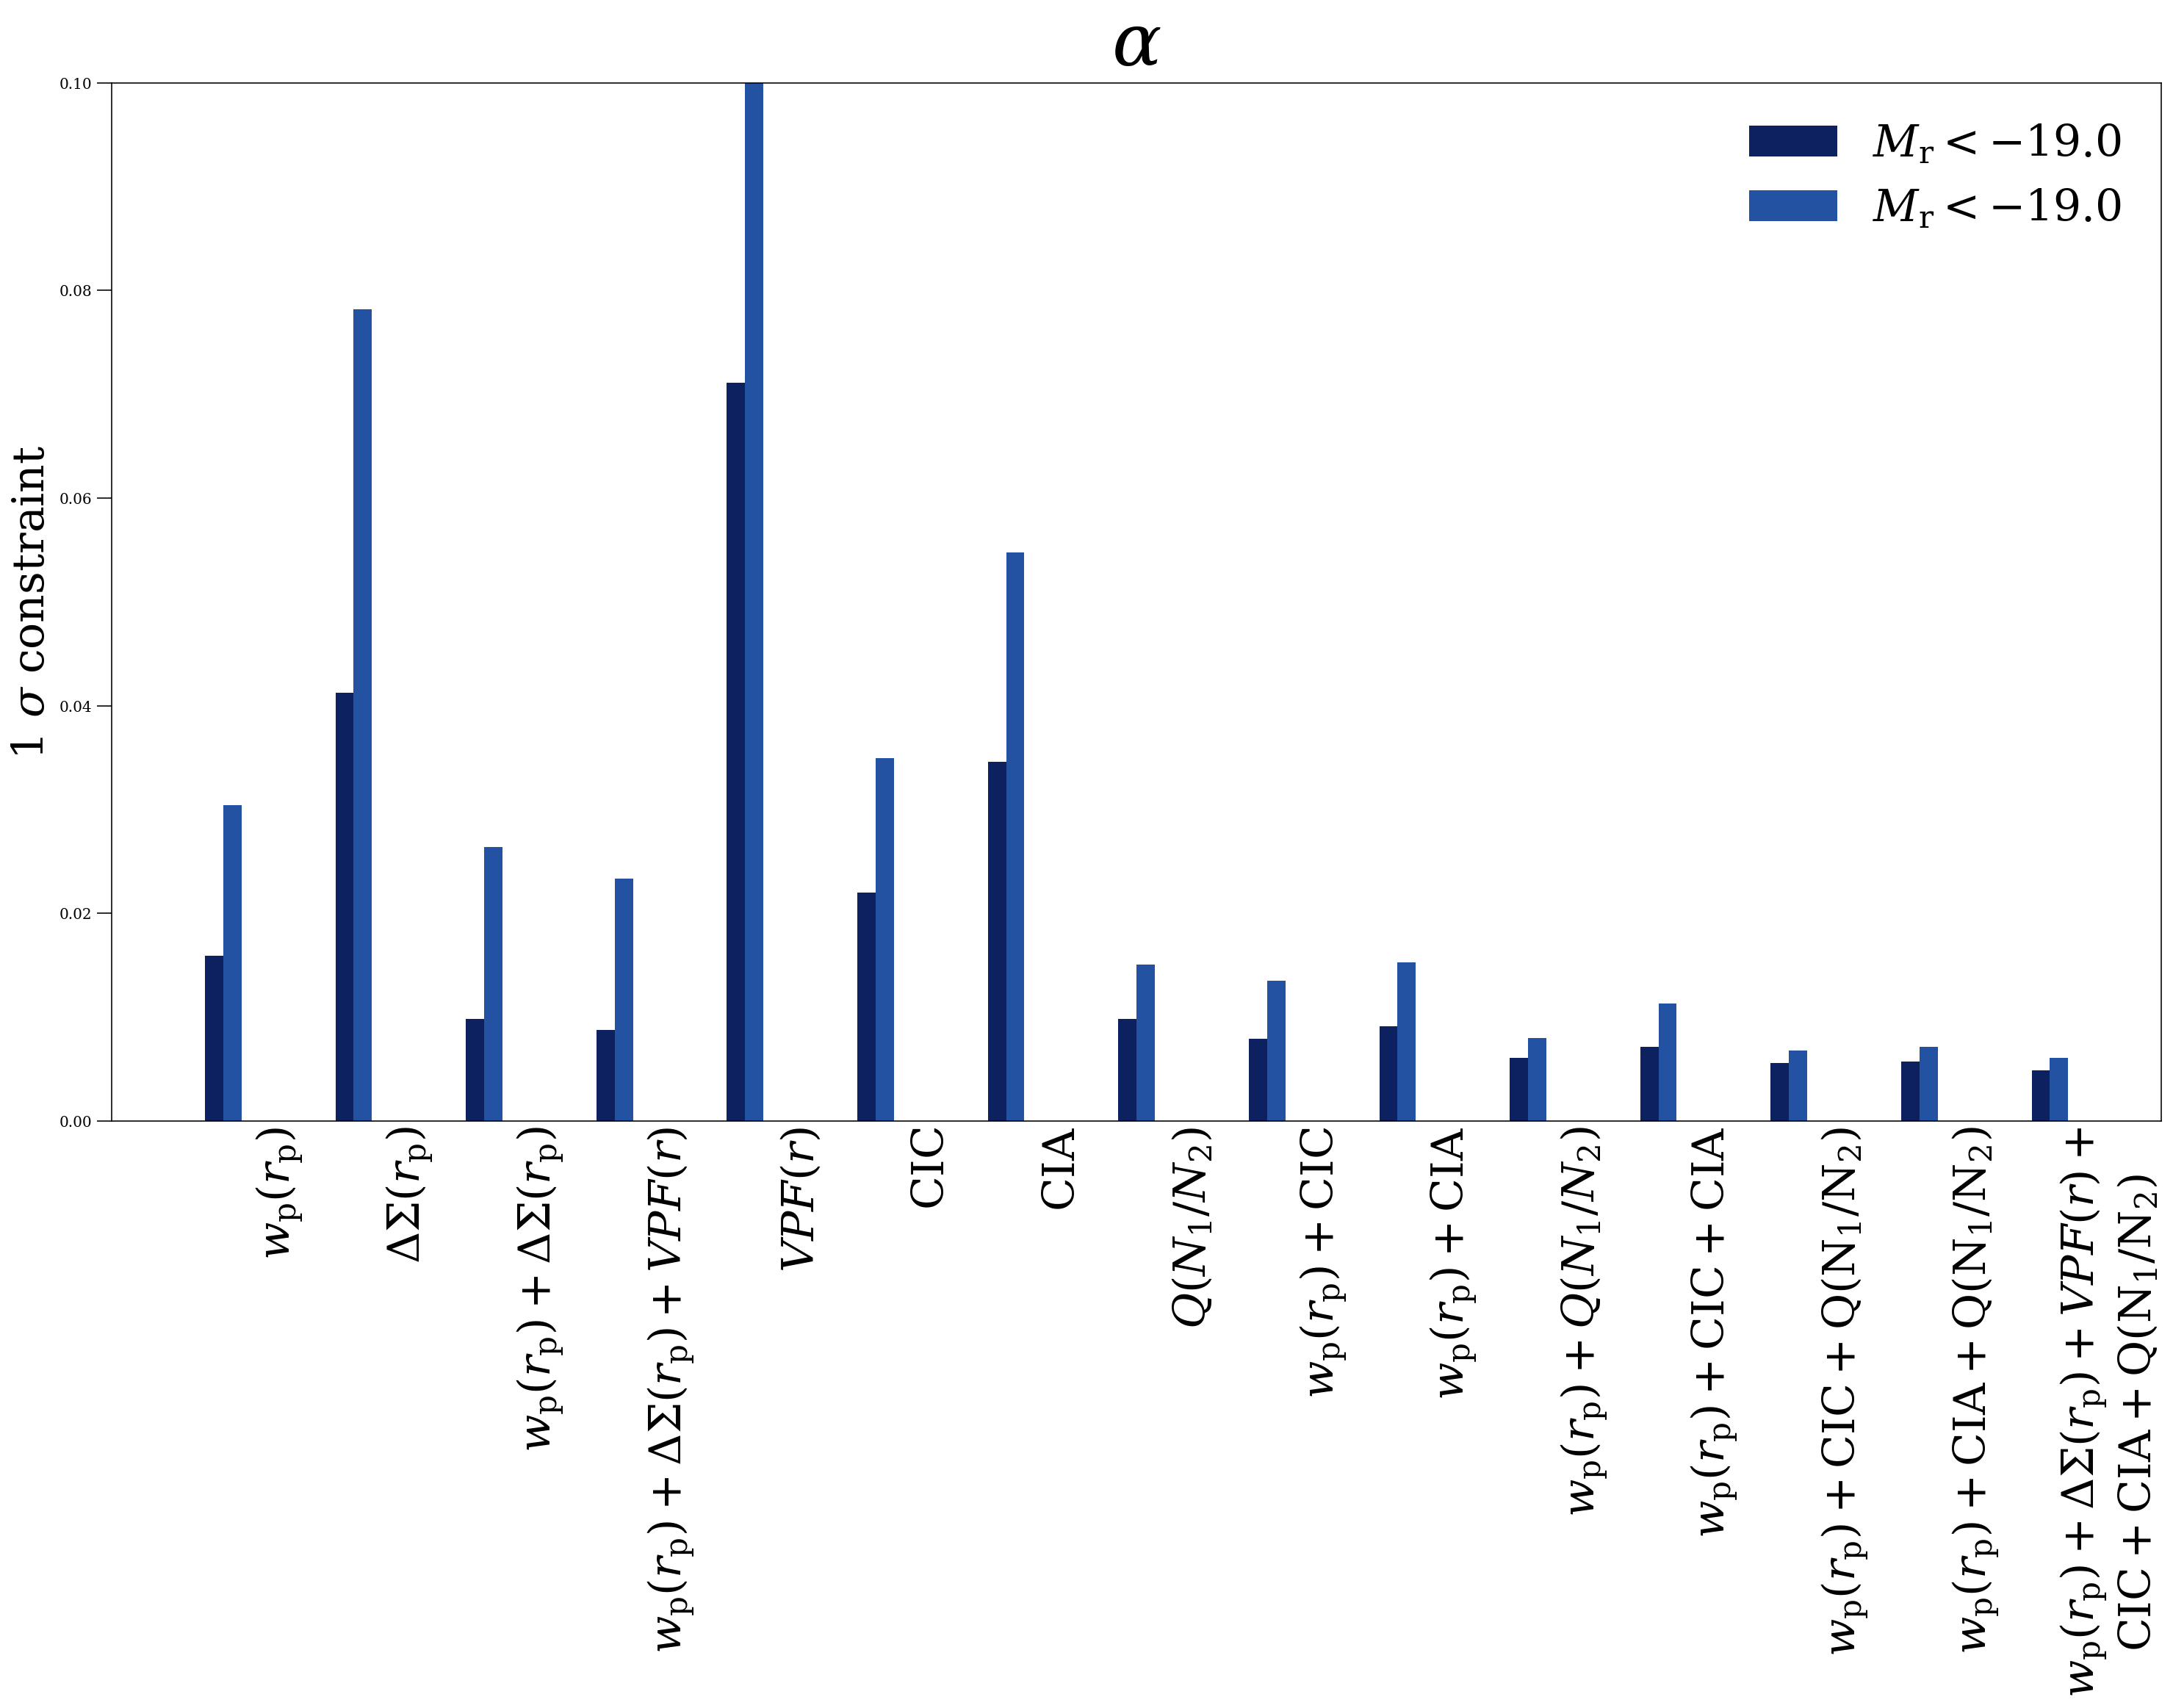

In [40]:
N = 15

ind = np.arange(N)  # the x locations for the groups
width = 0.14       # the width of the bars

fig, ax = plt.subplots(figsize=(25,13))
rects1 = ax.bar(ind, sigma01_19p0[combidx,0], width, color=cm.YlGnBu(250))
rects2 = ax.bar(ind+width, sigma_19p0[combidx,0], width, color=cm.YlGnBu(200))

# add some text for labels, title and axes ticks
ax.set_ylabel(r'$1\ \sigma\ \rm{constraint}$',fontsize=30)
ax.set_title(param_list[0],fontsize=50)
ax.set_xticks(np.arange(N)+0.5)
ax.set_xticklabels(comblist,rotation=90,fontsize=30)
#ax.set_yticklabels([0.0,0.2,0.4,0.6,0.8,1.0,1.2],fontsize=25)
ax.tick_params(axis='x',length=0)
ax.tick_params(axis='y',length=10)


ax.legend((rects1[0], rects2[0]),\
          (r'$M_{\rm{r}}<-19.0$',r'$M_{\rm{r}}<-19.0$'),frameon=False,fontsize=30)

ax.set_ylim(0,0.1)

plt.show()